# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [2]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [3]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [4]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [6]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [7]:
soup = BeautifulSoup(page.text, 'html')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [9]:
# soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [10]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/archaeology
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/archaeology
#
/theme/bookshelf
/theme/nobelprize
/theme/Courses
/theme/coronavirus-history
/theme/offline
https://nplus1.ru/blog/2022/09/29/women-entrepreneurs-in-russia-of-the-XIX-century
https://nplus1.ru/blog/2022/09/29/women-entrepreneurs-in-russia-of-the-XIX-century
https://nplus1.ru/blog/2022/09/26/two-party-system-in-USA
https://nplus1.ru/blog/2022/09/21/the-japanese-myths
https://nplus1.ru/blog/2022/09/16/archaeology-of-the-russian-internet
https://nplus1.ru/blog/2022/09/12/the-last-king-of-poland
https://nplus1.ru/blog/2022/09/08/other-russia
https://nplus1.ru/blog/2022/09/06/how-to-read-numbers
https://nplus1.ru/blog/2022/09/01/human-evolution-bones-genes-culture 
https://nplus1.ru/blog/2022/08/29/everything-that-moves
https://nplus1.ru/blog/2022/1

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [11]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append('https://nplus1.ru'+link.get('href'))
urls

['https://nplus1.ru/news/2022/10/05/mother-of-crew-dragons',
 'https://nplus1.ru/news/2022/10/05/bluberry-wolves',
 'https://nplus1.ru/news/2022/10/05/oxytocin-danio',
 'https://nplus1.ru/news/2022/10/05/matter-smart-home',
 'https://nplus1.ru/news/2022/10/05/Standing-PB',
 'https://nplus1.ru/news/2022/10/05/gold-coins',
 'https://nplus1.ru/news/2022/10/05/chem-nobel-2022',
 'https://nplus1.ru/news/2022/10/05/hominin-gestation',
 'https://nplus1.ru/news/2022/10/05/bamboo',
 'https://nplus1.ru/news/2022/10/04/dimorph-has-tail',
 'https://nplus1.ru/news/2022/10/04/early-dementia',
 'https://nplus1.ru/news/2022/10/04/vaping-is-ok',
 'https://nplus1.ru/news/2022/10/04/gboard',
 'https://nplus1.ru/news/2022/10/04/phys-nobel-2022',
 'https://nplus1.ru/news/2022/10/04/black-death',
 'https://nplus1.ru/news/2022/10/04/first-stars-or-no',
 'https://nplus1.ru/news/2022/10/04/disgust-of-body-odor',
 'https://nplus1.ru/news/2022/10/04/cows',
 'https://nplus1.ru/news/2022/10/04/tara',
 'https://npl

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные ‒ склеим с ссылкой https://nplus1.ru.

In [31]:
# full_urls = []

# for u in urls:
#     res = 'https://nplus1.ru' + u
#     full_urls.append(res) 

# full_urls

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [13]:
url0 = 'https://nplus1.ru/news/2022/10/04/cows'

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'html')

In [14]:
url0

'https://nplus1.ru/news/2022/10/04/cows'

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [15]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="7991d7eb02d759f05b9050e111a7e3eb" name="wmail-verification"/>,
 <meta content="2022-10-04" itemprop="datePublished"/>,
 <meta content="Сергей Коленов" name="mediator_author"/>,
 <meta content="Фермер позволит детенышу остаться с приемными родственниками" name="description"/>,
 <meta content="Сергей Коленов" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Немецкие коровы усыновили кабанчика" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2022/10/04/50a4a52949eee138c93683bfc33ee0ba.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2022/10/04/cows" property="og:url"/>,
 <meta content="Фермер позволит детенышу остаться с приемными родств

TypeError: print() argument after ** must be a mapping, not list

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [37]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Марат Хамадеев" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [38]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Марат Хамадеев" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [39]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Марат Хамадеев'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [41]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Марат Хамадеев'

Аналогичным образом извлечем дату, заголовок и описание.

In [42]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [47]:
soup0.find_all('p')[1]

<p class="table">
<a href="/news/2022/03/17">
<time content="2022-03-17" data-unix="1647530572" itemprop="datePublished">
<span>18:22</span>
<span>17 Март 2022</span>
</time>
</a>
</p>

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [48]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="physics" href="/rubric/physics">Физика</a>]

Получился список из одного элемента. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [49]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Физика']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [50]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">8.4</span>]

И выберем оттуда текст.

In [51]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'8.4'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [54]:
text_list = soup0.find_all('p', {'class' : None})

In [55]:
text_list

[<p>Физики продемонстрировали работу квантовой памяти для хранения кубитов с временным кодированием на основе кристалла <sup>151</sup>Eu<sup>3+</sup>:Y<sub>2</sub>SiO<sub>5</sub>. Они показали, что такая память способна хранить их до 20 миллисекунд, демонстрируя на выходе степень совпадения равную 85 процентам для одного фотона на кубит. Исследование <a href="https://www.nature.com/articles/s41534-022-00541-3" rel="nofollow" target="_blank">опубликовано</a> в <i>npj Quantum Information</i>.</p>,
 <p>Физики говорят о кубите, когда имеют дело с простейшей квантово-механической системой, которая может находиться в двух различных состояниях, а также в их квантовой суперпозиции. Отличительной особенностью кубитов стало то, что они могут быть запутаны друг с другом. Запутанность подразумевает наличие неклассических корреляций, и выражается через невозможность представить состояние двух или нескольких кубитов через произведение соответствующих одночастичных состояний.</p>,
 <p>Определение, пр

«Выцепим» все тексты (без тэгов) из полученного списка:

In [56]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [57]:
final_text = ' '.join(text)
final_text

'Физики продемонстрировали работу квантовой памяти для хранения кубитов с\xa0временным кодированием на\xa0основе кристалла 151Eu3+:Y2SiO5. Они показали, что такая память способна хранить их до\xa020\xa0миллисекунд, демонстрируя на\xa0выходе степень совпадения равную 85\xa0процентам для одного фотона на\xa0кубит. Исследование опубликовано в\xa0npj Quantum Information. Физики говорят о\xa0кубите, когда имеют дело с\xa0простейшей квантово-механической системой, которая может находиться в\xa0двух различных состояниях, а\xa0также в\xa0их\xa0квантовой суперпозиции. Отличительной особенностью кубитов стало\xa0то, что они могут быть запутаны друг с\xa0другом. Запутанность подразумевает наличие неклассических корреляций, и\xa0выражается через невозможность представить состояние двух или нескольких кубитов через произведение соответствующих одночастичных состояний. Определение, приведенное выше, достаточно общее. Это обуславливает огромное количество физических систем, которые были предложены дл

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [58]:
final_text = final_text.replace('\n', ' ')

In [59]:
final_text = final_text.replace('\xa0', ' ')

In [60]:
final_text

'Физики продемонстрировали работу квантовой памяти для хранения кубитов с временным кодированием на основе кристалла 151Eu3+:Y2SiO5. Они показали, что такая память способна хранить их до 20 миллисекунд, демонстрируя на выходе степень совпадения равную 85 процентам для одного фотона на кубит. Исследование опубликовано в npj Quantum Information. Физики говорят о кубите, когда имеют дело с простейшей квантово-механической системой, которая может находиться в двух различных состояниях, а также в их квантовой суперпозиции. Отличительной особенностью кубитов стало то, что они могут быть запутаны друг с другом. Запутанность подразумевает наличие неклассических корреляций, и выражается через невозможность представить состояние двух или нескольких кубитов через произведение соответствующих одночастичных состояний. Определение, приведенное выше, достаточно общее. Это обуславливает огромное количество физических систем, которые были предложены для реализаций кубитов. Они не только различаются по 

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [61]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    final_text = final_text.replace('\xa0', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [62]:
from time import sleep

In [63]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in urls:
    res = GetNews(link)
    news.append(res)
    sleep(1) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [64]:
news[0]

('https://nplus1.ru/news/2022/03/17/TB-qubit-memory',
 '2022-03-17',
 'Марат Хамадеев',
 'Это превышает предыдущий рекорд в 20 раз',
 'Физики научились хранить кубиты с временным кодированием 20 миллисекунд',
 'Физики продемонстрировали работу квантовой памяти для хранения кубитов с временным кодированием на основе кристалла 151Eu3+:Y2SiO5. Они показали, что такая память способна хранить их до 20 миллисекунд, демонстрируя на выходе степень совпадения равную 85 процентам для одного фотона на кубит. Исследование опубликовано в npj Quantum Information. Физики говорят о кубите, когда имеют дело с простейшей квантово-механической системой, которая может находиться в двух различных состояниях, а также в их квантовой суперпозиции. Отличительной особенностью кубитов стало то, что они могут быть запутаны друг с другом. Запутанность подразумевает наличие неклассических корреляций, и выражается через невозможность представить состояние двух или нескольких кубитов через произведение соответствующи

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [29]:
import pandas as pd

In [30]:
df = pd.DataFrame(news)

In [31]:
df.head(2)

,0,1,2,3,4,5,6,7
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Переименуем столбцы в базе.

In [32]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [33]:
df.head(2)

,link,date,author,desc,title,text,rubric,diffc
0,https://nplus1.ru/news/2019/03/31/first,2019-03-31,Илья Ферапонтов,Он должен заменить легкий транспортник Ан-26,Транспортный самолет Ил-112В совершил первый п...,Российский военно-транспортный самолет Ил-112В...,[Авиация],1.2
1,https://nplus1.ru/news/2019/03/30/very-big-bou...,2019-03-30,Александр Войтюк,В создании стереопары принял участие астрофизи...,OSIRIS-REx показал 52-метровую скалу на поверх...,Исследователи из команды миссии OSIRIS-REx соз...,[Астрономия],2.3


Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [34]:
df['diffc'] = [float(i) for i in df.diffc]

Теперь сложность представлена в базе как количественный показатель, и описывать ее можно соответствующим образом:

In [35]:
df.diffc.describe()

count    30.000000
mean      4.416667
std       2.370521
min       1.100000
25%       2.125000
50%       4.900000
75%       6.750000
max       8.200000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

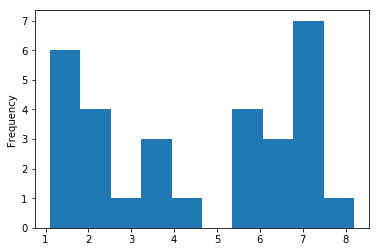

In [36]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [37]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [ ]:
df.text[0]

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'Российский военно-транспортный самолет Ил-112В совершил первый полет, сообщает Авиационный комплекс имени Ильюшина. Испытания прошли на аэродроме воронежского авиазавода ПАО «ВАСО», командиром экипажа был шеф-пилот ПАО «Ил» Герой России Николай Куимов. Первый полет стал завершением цикла аэродромной отработки, в ходе которой были проведены испытания всех систем, в том числе пробежки по аэродрому. Полет прошел в штатном режиме. В воздухе Ил-112В сопровождал самолет-лаборатория Ил-114ЛЛ. Ил-112В в перспективе должен заменить легкий транспортник Ан-26. Он будет использоваться для перевозки и десантирования легкой техники, грузов и бойцов, его грузоподъемность — около пяти тонн. Самолет сможет развивать скорость до 550 километров в час и совершать полеты на расстояние до 3,4 тысячи километров, а при взлете с грунтовых аэродромов и максимальной загрузкой — до 1,2 тысячи километров. Транспортник сможет взлетать с взлетно-посадочных полос длиной не более 900 метров. Пробег Ил-112В при посадк

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')